In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
# from sklearn.preprocessing import StandardScaler

# Inspecting Data

In [ ]:
df = pd.read_csv('Data/train_1.csv')

In [ ]:
df.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145062,Francisco_el_matemático_(serie_de_televisión_d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Page'].str.split('_')[73823]

['John', 'Lennon', 'en.wikipedia.org', 'mobile-web', 'all-agents']

In [ ]:
df.shape

(145063, 551)

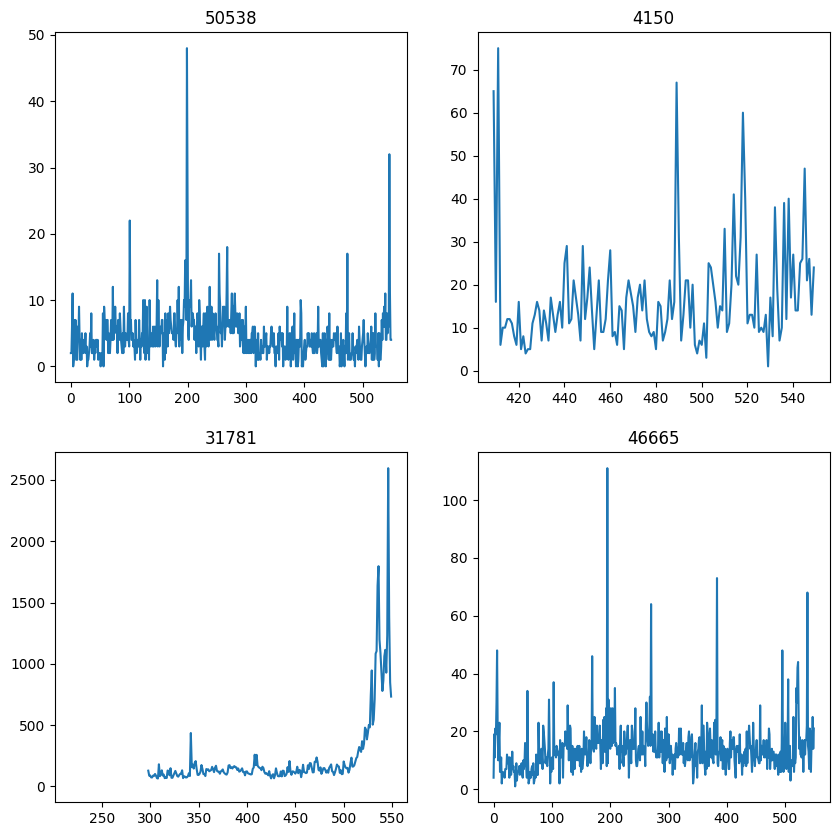

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        sample = random.randint(0, df.shape[0]-1)
        ax[i, j].plot(df.iloc[sample,1:].to_numpy())
        ax[i, j].set_title(sample)

The data for some websites is missing as shown. The websites themselves appear to be independent of one another.

In [ ]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


# Regression with windows

In [ ]:
def get_regression_model(window_size):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1, window_size)),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Dense(units=64, activation='tanh', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=128, activation='tanh', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units=1, activation='linear', kernel_initializer='he_normal')
    ], name='RegressionModel')
    return model

def prepare_data(data: np.ndarray, window_size: int, split=(0.8, 0.1, 0.1)):
    assert sum(split) == 1, 'Total Split must cover 100% of input data'
    samples = []
    labels = []
    for i in range(data.shape[0] - window_size):
        samples.append(data[i:i+window_size])
        labels.append(data[i+window_size])

    samples = np.array(samples).astype('float32')
    labels = np.array(labels).astype('float32')

    permutations = np.random.permutation(range(samples.shape[0]))
    samples = samples[permutations]
    labels = labels[permutations]

    num_train = int(split[0] * samples.shape[0])
    num_cv = int(split[1] * samples.shape[0])
    num_test = int(split[2] * samples.shape[0])

    train_set = samples[:num_train].reshape((num_train, 1, window_size))
    train_labels = labels[:num_train].reshape((num_train,))
    cv_set = samples[num_train:num_train+num_cv].reshape((num_cv, 1, window_size))
    cv_labels = labels[num_train:num_train+num_cv].reshape((num_cv,))
    test_set = samples[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv, 1, window_size))
    test_labels = labels[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv,))

    return train_set, train_labels, cv_set, cv_labels, test_set, test_labels

normalize = lambda x: (x - x.mean()) / x.std()

In [ ]:
train_data_pred = []
train_data_actual = []

cv_data_pred = []
cv_data_actual = []
for window in range(34, 35):
    train_set, train_labels, cv_set, cv_labels, test_set, test_labels = prepare_data(df.iloc[7,1:].to_numpy(), window)
    model = get_regression_model(window)
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005), metrics='accuracy')
    model.fit(normalize(train_set), normalize(train_labels), epochs=100, batch_size=32, validation_data=[cv_set, cv_labels])
    train_data_pred.append(model.predict(train_set).reshape((train_set.shape[0],)))
    train_data_actual.append(train_labels.reshape((train_set.shape[0],)))
    cv_data_pred.append(model.predict(cv_set).reshape((cv_set.shape[0],)))
    cv_data_actual.append(cv_labels.reshape((cv_set.shape[0],)))

Epoch 1/100
13/13 [==============================] - 2s 31ms/step - loss: 2.3564 - accuracy: 0.0000e+00 - val_loss: 2130.8955 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 2.1858 - accuracy: 0.0000e+00 - val_loss: 3559.5034 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 2.0947 - accuracy: 0.0000e+00 - val_loss: 3205.7285 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 2.0607 - accuracy: 0.0000e+00 - val_loss: 3211.2593 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 2.0562 - accuracy: 0.0000e+00 - val_loss: 2664.8162 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 2.0534 - accuracy: 0.0000e+00 - val_loss: 2950.7485 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 2.0314 - accu

KeyboardInterrupt: 

In [ ]:
window = 34
train_data_pred = []
train_data_actual = []

cv_data_pred = []
cv_data_actual = []
model = get_regression_model(window)
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.005), metrics='accuracy')
model.fit(train_set,train_labels, epochs=120, batch_size=32, validation_data=[cv_set, cv_labels])

#model.fit(normalize(train_set), normalize(train_labels), epochs=100, batch_size=32, validation_data=[cv_set, cv_labels])
train_data_pred.append(model.predict(train_set).reshape((train_set.shape[0],)))
train_data_actual.append(train_labels.reshape((train_set.shape[0],)))
cv_data_pred.append(model.predict(cv_set).reshape((cv_set.shape[0],)))
cv_data_actual.append(cv_labels.reshape((cv_set.shape[0],)))

Epoch 1/120
13/13 [==============================] - 2s 31ms/step - loss: 3866.3997 - accuracy: 0.0049 - val_loss: 2395.8674 - val_accuracy: 0.0000e+00
Epoch 2/120
13/13 [==============================] - 0s 7ms/step - loss: 2993.9297 - accuracy: 0.0049 - val_loss: 1604.7733 - val_accuracy: 0.0000e+00
Epoch 3/120
13/13 [==============================] - 0s 8ms/step - loss: 2897.0686 - accuracy: 0.0049 - val_loss: 1393.5897 - val_accuracy: 0.0000e+00
Epoch 4/120
13/13 [==============================] - 0s 7ms/step - loss: 2815.0752 - accuracy: 0.0049 - val_loss: 1448.9537 - val_accuracy: 0.0000e+00
Epoch 5/120
13/13 [==============================] - 0s 8ms/step - loss: 2822.5134 - accuracy: 0.0049 - val_loss: 1483.5221 - val_accuracy: 0.0000e+00
Epoch 6/120
13/13 [==============================] - 0s 7ms/step - loss: 2821.9492 - accuracy: 0.0049 - val_loss: 1365.2402 - val_accuracy: 0.0000e+00
Epoch 7/120
13/13 [==============================] - 0s 8ms/step - loss: 2868.0339 - accuracy

Epoch 55/120
13/13 [==============================] - 0s 8ms/step - loss: 2791.7898 - accuracy: 0.0049 - val_loss: 1393.4590 - val_accuracy: 0.0000e+00
Epoch 56/120
13/13 [==============================] - 0s 7ms/step - loss: 2797.8625 - accuracy: 0.0049 - val_loss: 1454.6479 - val_accuracy: 0.0000e+00
Epoch 57/120
13/13 [==============================] - 0s 10ms/step - loss: 2816.4216 - accuracy: 0.0049 - val_loss: 1352.1519 - val_accuracy: 0.0000e+00
Epoch 58/120
13/13 [==============================] - 0s 9ms/step - loss: 2846.6689 - accuracy: 0.0049 - val_loss: 1698.3544 - val_accuracy: 0.0000e+00
Epoch 59/120
13/13 [==============================] - 0s 8ms/step - loss: 2812.7061 - accuracy: 0.0049 - val_loss: 1346.1780 - val_accuracy: 0.0000e+00
Epoch 60/120
13/13 [==============================] - 0s 11ms/step - loss: 2849.7039 - accuracy: 0.0049 - val_loss: 1497.3466 - val_accuracy: 0.0000e+00
Epoch 61/120
13/13 [==============================] - 0s 9ms/step - loss: 2804.4622 - 

Epoch 109/120
13/13 [==============================] - 0s 8ms/step - loss: 2784.4902 - accuracy: 0.0049 - val_loss: 1508.5881 - val_accuracy: 0.0000e+00
Epoch 110/120
13/13 [==============================] - 0s 8ms/step - loss: 2777.8989 - accuracy: 0.0049 - val_loss: 1417.3459 - val_accuracy: 0.0000e+00
Epoch 111/120
13/13 [==============================] - 0s 8ms/step - loss: 2782.7190 - accuracy: 0.0049 - val_loss: 1499.4321 - val_accuracy: 0.0000e+00
Epoch 112/120
13/13 [==============================] - 0s 8ms/step - loss: 2781.7771 - accuracy: 0.0049 - val_loss: 1429.5190 - val_accuracy: 0.0000e+00
Epoch 113/120
13/13 [==============================] - 0s 7ms/step - loss: 2800.5964 - accuracy: 0.0049 - val_loss: 1511.3673 - val_accuracy: 0.0000e+00
Epoch 114/120
13/13 [==============================] - 0s 8ms/step - loss: 2800.2161 - accuracy: 0.0049 - val_loss: 1360.6696 - val_accuracy: 0.0000e+00
Epoch 115/120
13/13 [==============================] - 0s 7ms/step - loss: 2814.63

Window Size: 12


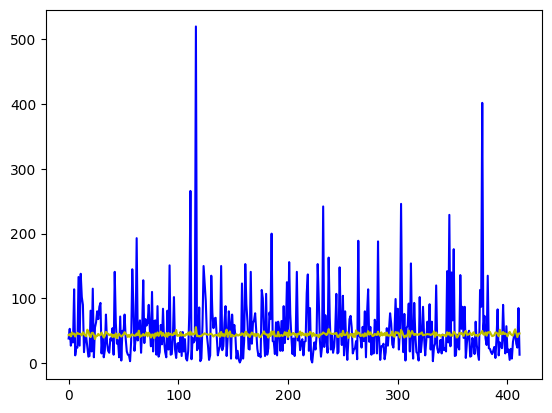

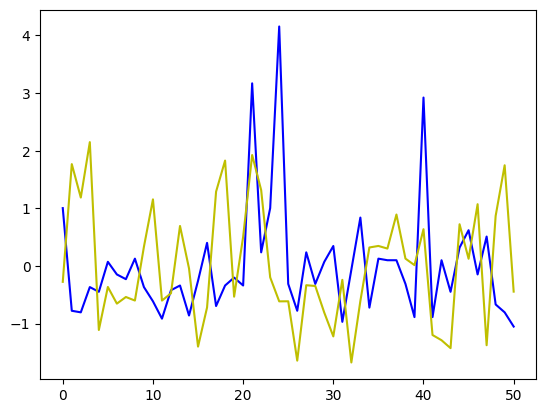

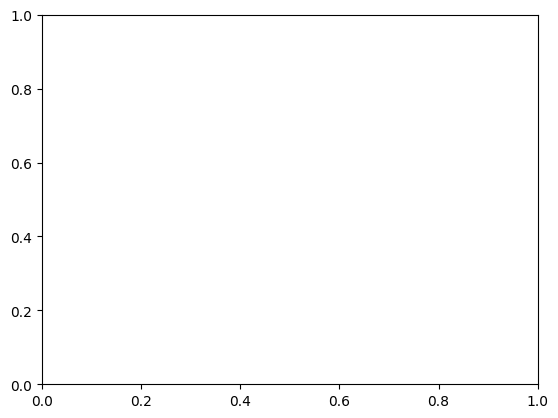

In [ ]:
total = len(train_data_pred)
for i in range(total):
    print('Window Size:', i + 12)
    plt.plot(train_data_actual[i],c='b')
    plt.plot(train_data_pred[i], c='y')

    plt.show()
    plt.cla()

    plt.plot(normalize(cv_data_actual[i]), c='b')
    plt.plot(normalize(cv_data_pred[i]), c='y')

    plt.show()
    plt.cla()

In [ ]:
model.summary()

Model: "RegressionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 1, 34)            136       
 hNormalization)                                                 
                                                                 
 dense_1314 (Dense)          (None, 1, 64)             2240      
                                                                 
 dense_1315 (Dense)          (None, 1, 128)            8320      
                                                                 
 dense_1316 (Dense)          (None, 1, 128)            16512     
                                                                 
 dense_1317 (Dense)          (None, 1, 128)            16512     
                                                                 
 dense_1318 (Dense)          (None, 1, 64)             8256      
                                                   

In [ ]:
np.any(df.iloc[7,1:].to_numpy() == 0)

False

# Time Series Dataset

In [ ]:
df = pd.read_csv('Data/Electric_Production.xls')
df.columns = ['Date', 'Prod']

In [ ]:
df

,Date,Prod
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


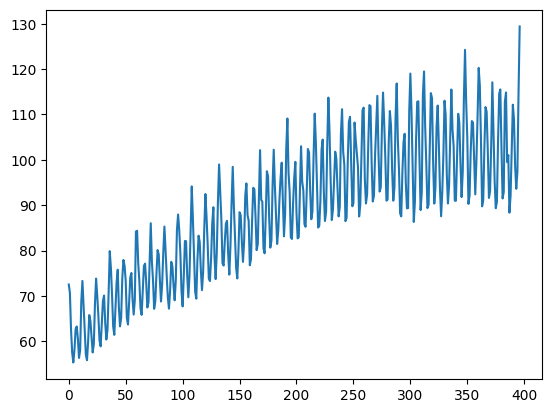

In [ ]:
plt.plot(df['Prod'].to_numpy())

In [ ]:
def get_regression_model(window_size):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1, window_size)),
#         tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Dense(units=64, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),

        tf.keras.layers.Dense(units=128, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=64, activation='leaky_relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(units=1, activation='relu', kernel_initializer='he_normal')
    ], name='RegressionModel')
    return model

def prepare_data(data: np.ndarray, window_size: int, split=(0.8, 0.1, 0.1)):
    assert sum(split) == 1, 'Total Split must cover 100% of input data'
    samples = []
    labels = []
    for i in range(data.shape[0] - window_size):
        samples.append(data[i:i+window_size])
        labels.append(data[i+window_size])

    samples = np.array(samples).astype('float32')
    labels = np.array(labels).astype('float32')

#     permutations = np.random.permutation(range(samples.shape[0]))
#     samples = samples[permutations]
#     labels = labels[permutations]

    num_train = int(split[0] * samples.shape[0])
    num_cv = int(split[1] * samples.shape[0])
    num_test = int(split[2] * samples.shape[0])

    train_set = samples[:num_train].reshape((num_train, 1, window_size))
    train_labels = labels[:num_train].reshape((num_train,))
    cv_set = samples[num_train:num_train+num_cv].reshape((num_cv, 1, window_size))
    cv_labels = labels[num_train:num_train+num_cv].reshape((num_cv,))
    test_set = samples[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv, 1, window_size))
    test_labels = labels[num_train+num_cv:].reshape((samples.shape[0] - num_train - num_cv,))

    return train_set, train_labels, cv_set, cv_labels, test_set, test_labels

normalize = lambda x: (x - x.mean()) / x.std()

In [ ]:
window_size = 50
model = get_regression_model(window_size)


In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.000000000001))

In [ ]:
train_set, train_labels, cv_set, cv_labels, test_set, test_labels = prepare_data(df['Prod'].to_numpy(), window_size)

In [ ]:
history = model.fit(train_set, train_labels, epochs=5, batch_size=32, verbose=False)

9/9 [==============================] - 1s 4ms/step


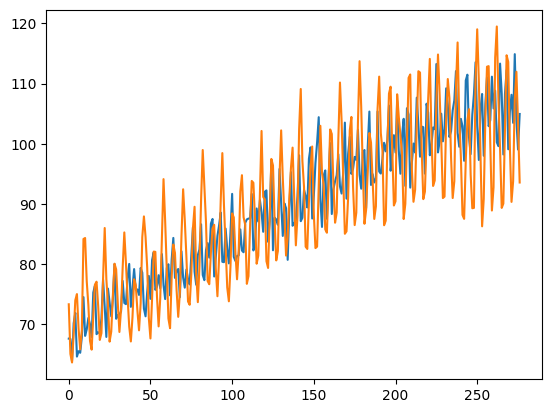

In [ ]:
plt.plot(model.predict(train_set).reshape(train_labels.shape))
plt.plot(train_labels)

In [ ]:
data = df['Prod'].to_numpy()
samples = []
for i in range(data.shape[0] - window_size):
    samples.append(data[i:i+window_size])
samples = np.array(samples).astype('float32').reshape(len(samples), 1, window_size)

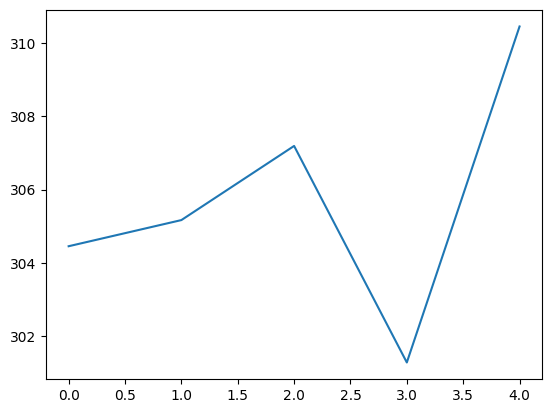

In [ ]:
plt.plot(history.history['loss'][:100])

11/11 [==============================] - 0s 4ms/step


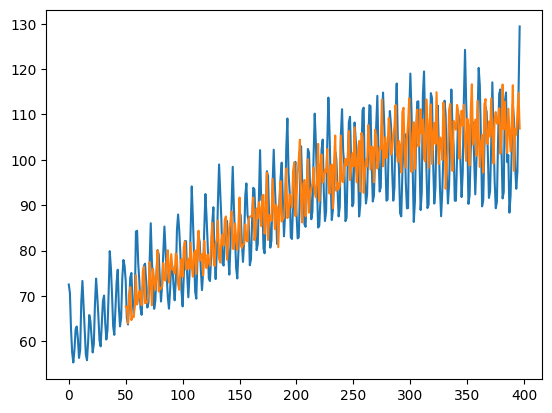

In [ ]:
plt.plot(range(len(df['Prod'])), df['Prod'])
plt.plot(range(window_size, len(df['Prod'])), model.predict(samples).ravel())

# LSTM Model

In [4]:
df = pd.read_csv('Data/Electric_Production.xls')
df.columns = ['Date', 'Prod']

In [5]:
hidden_states = 64
densor_x = tf.keras.layers.Dense(units=16, kernel_initializer='he_normal', activation='leaky_relu', input_shape=(1,1))

update_gate = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', activation='sigmoid', input_shape=(80,))
forget_gate = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', activation='sigmoid', input_shape=(80,))
densor_a = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', activation='tanh', input_shape=(80,))

update_gate_first = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', activation='sigmoid', input_shape=(16,))
forget_gate_first = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', activation='sigmoid', input_shape=(16,))
densor_a_first = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', activation='tanh', input_shape=(16,))

densor_a_out = tf.keras.layers.Dense(units=16, kernel_initializer='he_normal', activation='tanh', input_shape=(64,))
densor_y = tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', activation='relu', input_shape=(16,))



In [6]:
def get_model(samples):
    X = tf.keras.Input(shape=(samples, 1))
    out1 = densor_x(X[:, 0, :])
    out_u = update_gate_first(out1)
    out_f = forget_gate_first(out1)
    a0 = densor_a_first(out1)
    c0 = tf.keras.layers.add([out_u, out_f])
    out1 = tf.keras.layers.Concatenate(axis=-1)([a0, c0])
    out1 = densor_a_out(out1)
    out1 = densor_y(out1)

    outputs = [out1]

    for i in range(1, samples):
        x = X[:, i, :]
        x = densor_x(x)

        o1 = tf.keras.layers.Concatenate(axis=-1)([x, a0])
        ug = update_gate(o1)
        fg = forget_gate(o1)
        ug_term = tf.math.multiply(c0, ug)
        fg_term = tf.math.multiply(c0, fg)
        c0 = tf.keras.layers.add([ug_term, fg_term])
        a0 = densor_a(o1)

        out = tf.keras.layers.Concatenate(axis=-1)([a0, c0])
        out = densor_a_out(out)
        out = densor_y(out)
        outputs.append(out)

    return tf.keras.Model(inputs=X, outputs=outputs, name='LSTM_Model')


In [7]:
model = get_model(320)

In [40]:
model.summary()

Model: "LSTM_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 320, 1)]     0           []                               
                                                                                                  
 tf.__operators__.getitem_323 (  (None, 1)           0           ['input_5[0][0]']                
 SlicingOpLambda)                                                                                 
                                                                                                  
 dense_9 (Dense)                (None, 16)           32          ['tf.__operators__.getitem_323[0]
                                                                 [0]',                            
                                                                  'tf.__operators__.getit

In [8]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

In [9]:
train_data = df['Prod'][:320].to_numpy().reshape((1, 320, 1))
train_labels = df['Prod'][1:321].to_numpy().reshape((1, 320, 1))

In [10]:
history = model.fit(train_data, train_labels, epochs=50)

Epoch 1/50
1/1 [==============================] - 173s 173s/step - loss: nan - dense_17_loss: 7413.1904 - dense_17_1_loss: 7381.1064 - dense_17_2_loss: 7427.1768 - dense_17_3_loss: 7409.2983 - dense_17_4_loss: 7418.2251 - dense_17_5_loss: 7418.9321 - dense_17_6_loss: 7418.9282 - dense_17_7_loss: 7418.9282 - dense_17_8_loss: 7418.9282 - dense_17_9_loss: 7418.9282 - dense_17_10_loss: 7418.9282 - dense_17_11_loss: 7418.9282 - dense_17_12_loss: 7418.9282 - dense_17_13_loss: 7418.9282 - dense_17_14_loss: 7418.9282 - dense_17_15_loss: 7418.9282 - dense_17_16_loss: 7418.9282 - dense_17_17_loss: 7418.9282 - dense_17_18_loss: 7418.9282 - dense_17_19_loss: 7418.9282 - dense_17_20_loss: 7418.9282 - dense_17_21_loss: 7418.9282 - dense_17_22_loss: 7418.9282 - dense_17_23_loss: 7418.9282 - dense_17_24_loss: 7418.9282 - dense_17_25_loss: 7418.9282 - dense_17_26_loss: 7418.9282 - dense_17_27_loss: 7418.9282 - dense_17_28_loss: 7418.9282 - dense_17_29_loss: 7418.9282 - dense_17_30_loss: 7418.9282 - den

In [11]:
pred = model.predict(train_data)

1/1 [==============================] - 18s 18s/step


In [12]:
pred_labels = [x[0][0] for x in pred]

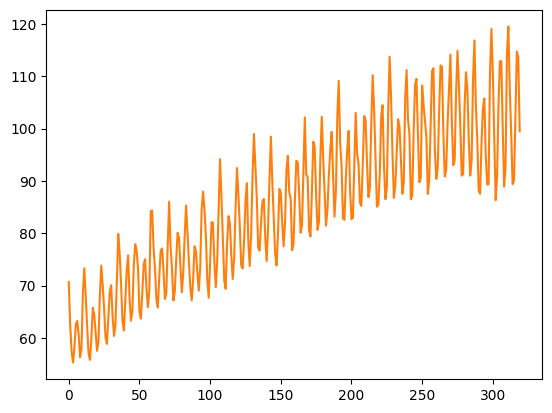

In [13]:
plt.plot(pred_labels)
plt.plot(train_labels.reshape(320,))

In [17]:
pred_labels[7]

nan

In [18]:
densor_a.weights

[<tf.Variable 'dense_12/kernel:0' shape=(80, 64) dtype=float32, numpy=
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(64,) dtype=float32, numpy=
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=float32)>]

# Test

In [46]:
# Load and prepare data
df = pd.read_csv('Data/BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('Data/BTC-USD_test.csv')

In [28]:
# Preview Data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [83]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
train_label = df['Open'][1:].to_numpy()
test_set = df_test[['High', 'Low', 'Close']][:-1].to_numpy()
test_set_full = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_label = df_test['Open'][1:].to_numpy()
print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Train Labels: {train_label.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Shape of Test Labels: {test_label.shape}')

Shape of Train Set: (1096, 4)
Shape of Train Labels: (1096,)
Shape of Test Set: (181, 3)
Shape of Test Labels: (181,)


In [32]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,), name='InputLayer'),
    tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='LinearUnit')
], name='RegressionModel')

2023-07-20 23:36:18.661125: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-20 23:36:18.663061: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-20 23:36:18.664486: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (AR-HPNotebook): /proc/driver/nvidia/version does not exist
2023-07-20 23:36:18.675814: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.summary()

Model: "RegressionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LinearUnit (Dense)          (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(train_set, train_label, epochs=15, batch_size=32)

Epoch 1/15
35/35 [==============================] - 0s 2ms/step - loss: 36626728.0000
Epoch 2/15
35/35 [==============================] - 0s 2ms/step - loss: 8690142.0000
Epoch 3/15
35/35 [==============================] - 0s 2ms/step - loss: 4043625.0000
Epoch 4/15
35/35 [==============================] - 0s 2ms/step - loss: 3888303.7500
Epoch 5/15
35/35 [==============================] - 0s 2ms/step - loss: 3887057.5000
Epoch 6/15
35/35 [==============================] - 0s 2ms/step - loss: 3879927.7500
Epoch 7/15
35/35 [==============================] - 0s 3ms/step - loss: 3893909.0000
Epoch 8/15
35/35 [==============================] - 0s 2ms/step - loss: 3882248.5000
Epoch 9/15
35/35 [==============================] - 0s 2ms/step - loss: 3885646.2500
Epoch 10/15
35/35 [==============================] - 0s 3ms/step - loss: 3884644.0000
Epoch 11/15
35/35 [==============================] - 0s 3ms/step - loss: 3889708.7500
Epoch 12/15
35/35 [==============================] - 0s 2ms/st

RMSE: 1961.0823


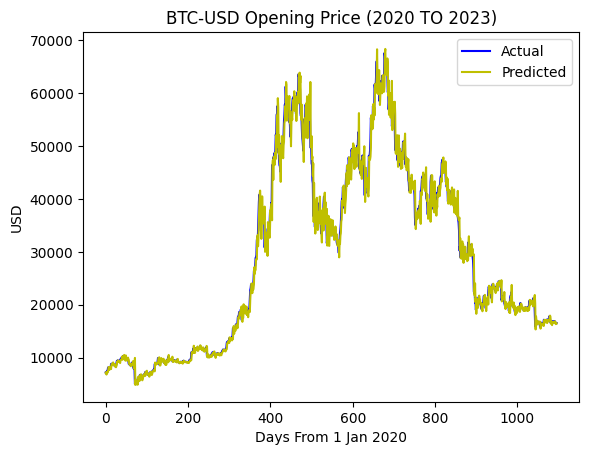

In [49]:
# Check Prediction on Train Set
pred = model.predict(train_set, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(train_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - train_label)) / train_label.shape[0]), 4)}')

RMSE: 954.6435


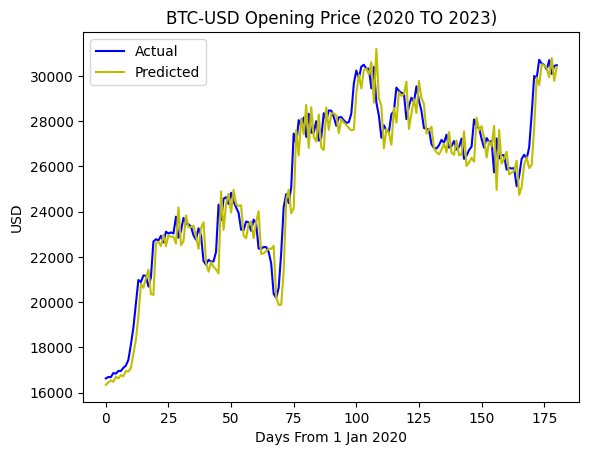

In [84]:
# Check Prediction on Test Set
pred = model.predict(test_set_full, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / test_label.shape[0]), 4)}')

RMSE: 162270.0923


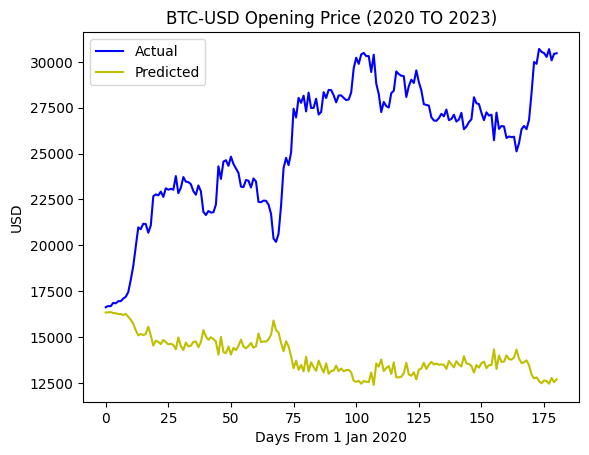

In [81]:
# Check Prediction on Test Set
open_price = df_test['Open'][0]
pred = []
for i in range(test_label.shape[0]):
    pred.append(model.predict(np.array([open_price, *test_set[i].tolist()]).reshape(1, 4), verbose=False).ravel())
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / test_label.shape[0]), 4)}')

# CNN Model

In [61]:
conv_layer = tf.keras.layers.Conv2D(7, 1, padding='same',name='ConvLayer')
dense_layer = tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='DenseLayer')
def get_cnn_model():
    inputs = tf.keras.Input(shape=(2,2,1), name='InputLayer')
    o = conv_layer(inputs)
    o = tf.keras.layers.Flatten(name='FlattenLayer')(o)
    outputs = dense_layer(o)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs, name='CNNModel')

In [62]:
cnn = get_cnn_model()
cnn.summary()

Model: "CNNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 2, 2, 1)]         0         
                                                                 
 ConvLayer (Conv2D)          (None, 2, 2, 7)           14        
                                                                 
 FlattenLayer (Flatten)      (None, 28)                0         
                                                                 
 DenseLayer (Dense)          (None, 1)                 29        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [64]:
cnn.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
cnn.fit(train_set.reshape((train_set.shape[0], 2, 2, 1)), train_label, epochs=15, batch_size=32)

Epoch 1/15
35/35 [==============================] - 1s 2ms/step - loss: 877749.5000
Epoch 2/15
35/35 [==============================] - 0s 2ms/step - loss: 738425.3750
Epoch 3/15
35/35 [==============================] - 0s 2ms/step - loss: 723392.1250
Epoch 4/15
35/35 [==============================] - 0s 2ms/step - loss: 707355.1250
Epoch 5/15
35/35 [==============================] - 0s 2ms/step - loss: 696123.3750
Epoch 6/15
35/35 [==============================] - 0s 2ms/step - loss: 677306.3750
Epoch 7/15
35/35 [==============================] - 0s 2ms/step - loss: 647914.3125
Epoch 8/15
35/35 [==============================] - 0s 3ms/step - loss: 640901.0000
Epoch 9/15
35/35 [==============================] - 0s 3ms/step - loss: 662026.0625
Epoch 10/15
35/35 [==============================] - 0s 2ms/step - loss: 636972.9375
Epoch 11/15
35/35 [==============================] - 0s 2ms/step - loss: 668859.7500
Epoch 12/15
35/35 [==============================] - 0s 2ms/step - loss: 5

RMSE: 725.2029


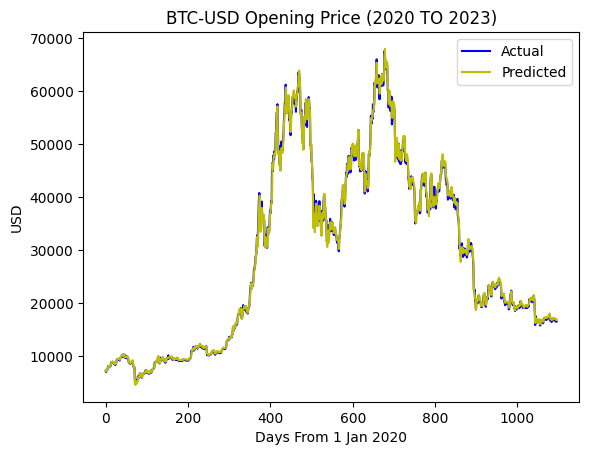

In [65]:
# Check Prediction on Train Set
pred = cnn.predict(train_set.reshape((train_set.shape[0], 2, 2, 1)), verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(train_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - train_label)) / train_label.shape[0]), 4)}')

RMSE: 66021.19240


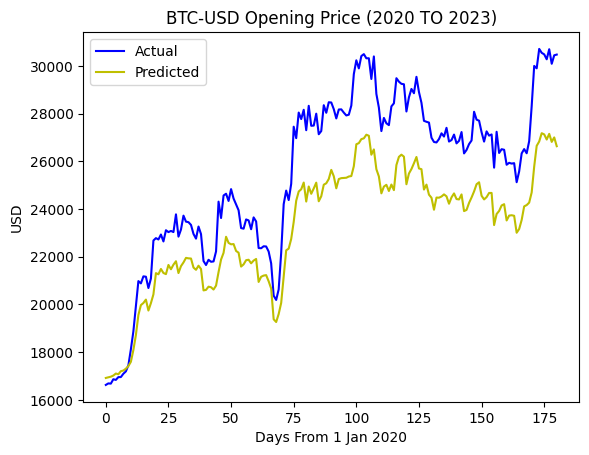

In [85]:
open_price = df_test['Open'][0]
pred = []
for i in range(test_label.shape[0]):
    if i % 100 == 0:
        print(f'[+] Completed {i}', end='\r')
    pred.append(cnn.predict(np.array([open_price, *test_set[i].tolist()]).reshape(1, 2, 2, 1), verbose=False).ravel())
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / test_label.shape[0]), 4)}')

RMSE: 446.1929


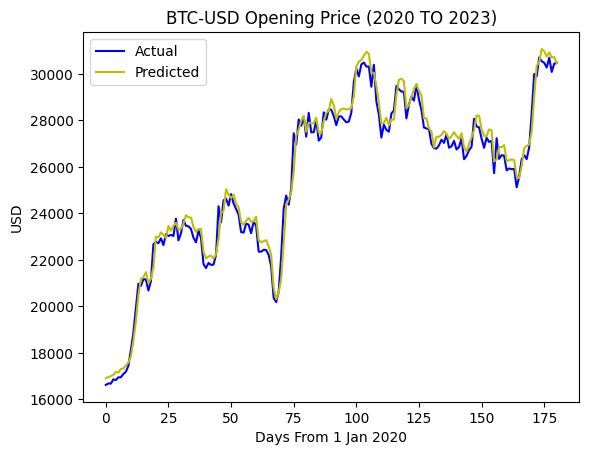

In [66]:
# Check Prediction on Test Set
pred = cnn.predict(test_set_full.reshape((test_set.shape[0], 2, 2, 1)), verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / test_label.shape[0]), 4)}')

# LSTM

In [77]:
lstm_layer = tf.keras.layers.LSTM(units=64, name='LSTMLayer', return_state=True)
dense_layer = tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='DenseLayer')
def get_lstm_model_train(n_steps):
    inputs = tf.keras.Input(shape=(n_steps, 4), name='InputLayer')
    a0 = tf.keras.Input(shape=(64,), name='Activations')
    c0 = tf.keras.Input(shape=(64,), name='HiddenStates')
    
    a = a0
    c = c0
    outputs = []
    
    for i in range(n_steps):
        x = inputs[:, i, :]
        x = tf.keras.layers.Reshape((1, 4))(x)
        a, _, c = lstm_layer(x, initial_state=[a, c])
        o = dense_layer(a)
        outputs.append(o)
    return tf.keras.Model(inputs=[inputs, a0, c0], outputs=outputs, name='LSTMModel')

In [ ]:
lstm = get_lstm_model_train(train_label.shape[0])